# Microsoft Movie Analysis

![Movie Teather](https://unsplash.com/photos/TFRezw7pQwI)

## Overview

This project analyzed the movie industry on behalf of Microsoft Inc., which is considering investing in the movie business. Due to the numerous factors that influence the success of a movie across various platforms, and considering Microsoft's time constraints and pressure, we focused on analyzing a limited number of key parameters to gain insights and generate actionable recommendations for the Microsoft board of directors.

## Business Problem

Microsoft is exploring the possibility of entering the movie industry using its surplus cash. In 2019, the movie business was valued at <span>&#36;</span>42.2 billion, while the global film industry, including box office and home entertainment revenue, was worth <span>&#36;</span>136 billion in 2018. To assess the viability of such an investment, Microsoft is planning to conduct a thorough analysis of the movie business, focusing on aspects such as profitability and budget. Once the Microsoft board approves the investment, the company will move forward with hiring directors, writers, and actors.

## Data Understanding

The Microsoft Marketing team provided us with several datasets pertaining to the movie industry. After careful consideration, we selected the two most relevant and reliable datasets. Using these datasets, we were able to evaluate and analyze various types of data such as dates, profits, budgets, and other relevant factors.

In [15]:
# Import Libraries

import pandas as pd
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt

import warnings
# Ignore all warning messages
warnings.filterwarnings('ignore')

%matplotlib inline

In [16]:
# Read Budget and Profit dataset
tn_budget_df = pd.read_csv("../data/tn.movie_budgets.csv.gz")

## Data Cleaning

In [17]:
tn_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [4]:
# There are not null entries in the dataset

In [18]:
tn_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [19]:
# Add a column year to the dataset
tn_budget_df['year'] = tn_budget_df['release_date'].apply(lambda x: x[-4:]).astype('int')

In [20]:
# Change the type and extract the commas ',' from the 
# `production_budget`, `domestic_gross`, and `worldwide_gross` values.
tn_budget_df['worldwide_gross'] = tn_budget_df['worldwide_gross'].apply(lambda x: x[1:]).str.replace(',', '').astype('float')
tn_budget_df['domestic_gross'] = tn_budget_df['domestic_gross'].apply(lambda x: x[1:]).str.replace(',', '').astype('float')
tn_budget_df['production_budget'] = tn_budget_df['production_budget'].apply(lambda x: x[1:]).str.replace(',', '').astype('float')

In [7]:
tn_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017


In [21]:
# Elimante `all` domestic_gross entries that are Zero (0)
tn_budget_df = tn_budget_df[tn_budget_df['domestic_gross'] != 0]

In [22]:
tn_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5234 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5234 non-null   int64  
 1   release_date       5234 non-null   object 
 2   movie              5234 non-null   object 
 3   production_budget  5234 non-null   float64
 4   domestic_gross     5234 non-null   float64
 5   worldwide_gross    5234 non-null   float64
 6   year               5234 non-null   int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 327.1+ KB


In [23]:
# There were (5782 - 5234) = 548 movies remove from the dataset because `domestic_gross` was Zero (0)

In [24]:
tn_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017


In [25]:
# Add a new column for the `profit`
tn_budget_df['profit'] = tn_budget_df['worldwide_gross'] - tn_budget_df['production_budget']

In [26]:
tn_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,profit
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2009,2.351345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,6.350639e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,-2.002376e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,1.072414e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,9.997217e+08


In [27]:
# Add a new column for the `profit_margin`
tn_budget_df['profit_margin'] = (tn_budget_df['worldwide_gross'] - tn_budget_df['production_budget']) / tn_budget_df['worldwide_gross']

In [28]:
tn_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5234 entries, 0 to 5781
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5234 non-null   int64  
 1   release_date       5234 non-null   object 
 2   movie              5234 non-null   object 
 3   production_budget  5234 non-null   float64
 4   domestic_gross     5234 non-null   float64
 5   worldwide_gross    5234 non-null   float64
 6   year               5234 non-null   int64  
 7   profit             5234 non-null   float64
 8   profit_margin      5234 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 408.9+ KB


In [31]:
# Apply a inflation rate of 3.5% to production_budget and profit
tn_budget_df['adjusted_production_budget'] = (
    ((( 2022 - tn_budget_df['year']) * 0.035 ) + 1 ) * tn_budget_df['production_budget']
)
tn_budget_df['adjusted_profit'] = (((( 2022 - tn_budget_df['year']) * 0.035 ) + 1 ) * tn_budget_df['profit'])
tn_budget_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,profit,profit_margin,adjusted_production_budget,adjusted_profit
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2009,2.351345e+09,0.846921,618375000.0,3.421207e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,6.350639e+08,0.607331,568681000.0,8.795635e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,-2.002376e+08,-1.337036,386750000.0,-2.212626e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,1.072414e+09,0.764364,411597000.0,1.335155e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,9.997217e+08,0.759251,372475000.0,1.174673e+09
...,...,...,...,...,...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,7000.0,70071.0,7.164400e+04,2006,6.464400e+04,0.902295,10920.0,1.008446e+05
5776,77,"Dec 31, 2004",The Mongol King,7000.0,900.0,9.000000e+02,2004,-6.100000e+03,-6.777778,11410.0,-9.943000e+03
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05,1999,2.344950e+05,0.975051,10830.0,4.232635e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,2005,-3.662000e+03,-2.736921,7975.0,-5.840890e+03


## Analysis

### We considered that the following questions were the most relevants due to the time constraints

- What are the most profitable movies, and how much should you spend?
- What are the most common genre?
- What is the best time of the year to release a movie?

## What are the most profitable movies and how much should you spend?

Let's calculate profit as worldwide_gross - production_budget

In [33]:
# We are interested only in the movies that are profitables,
# to calcualte `profit` as (`worldwide_profit` - `production_budget`)
profitable_movies_df = tn_budget_df[tn_budget_df['profit'] > 0]
profitable_movies_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,profit,profit_margin,adjusted_production_budget,adjusted_profit
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2009,2.351345e+09,0.846921,618375000.0,3.421207e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,6.350639e+08,0.607331,568681000.0,8.795635e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,1.072414e+09,0.764364,411597000.0,1.335155e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,9.997217e+08,0.759251,372475000.0,1.174673e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2015,1.747311e+09,0.850972,380970000.0,2.175402e+09


In [34]:
# Sort the dataset by adjusted profit column
profitable_ranked_df = profitable_movies_df.sort_values(by=['adjusted_profit'], ascending=False)
profitable_ranked_df.reset_index(inplace=True)
profitable_ranked_df.head()

,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,profit,profit_margin,adjusted_production_budget,adjusted_profit
0,42,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,1997,2.008208e+09,0.909429,375000000.0,3.765391e+09
1,0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2009,2.351345e+09,0.846921,618375000.0,3.421207e+09
2,5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2015,1.747311e+09,0.850972,380970000.0,2.175402e+09
3,3464,65,"May 25, 1977",Star Wars Ep. IV: A New Hope,11000000.0,460998007.0,7.865980e+08,1977,7.755980e+08,0.986016,28325000.0,1.997165e+09
4,6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,1.748134e+09,0.853525,342000000.0,1.992873e+09


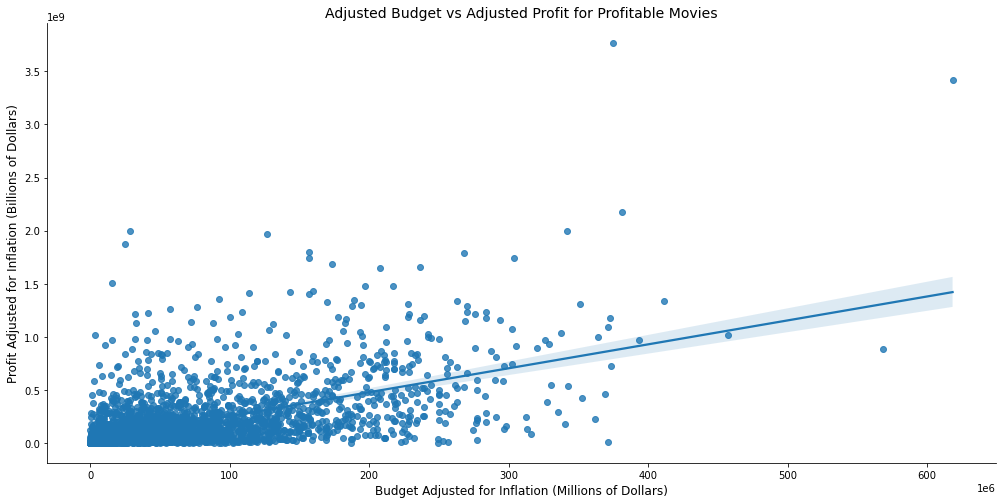

In [35]:
# Plot to take a look to the behavior of adjusted profit vs adjusted production budget
ax1 = sns.lmplot(
    x='adjusted_production_budget', y='adjusted_profit', data=profitable_ranked_df, height=7, aspect=2)
plt.xlabel('Budget Adjusted for Inflation (Millions of Dollars)', fontsize=12)
plt.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
plt.ylabel('Profit Adjusted for Inflation (Billions of Dollars)', fontsize=12)
plt.title('Adjusted Budget vs Adjusted Profit for Profitable Movies', fontsize=14)
plt.savefig('budget_vs_profit');

**This scatter plot is helpful in beginning to understand how much money should be budgeted for a movie. The positive trend line indicates that an increase in the budget will result in an increase in profit.**

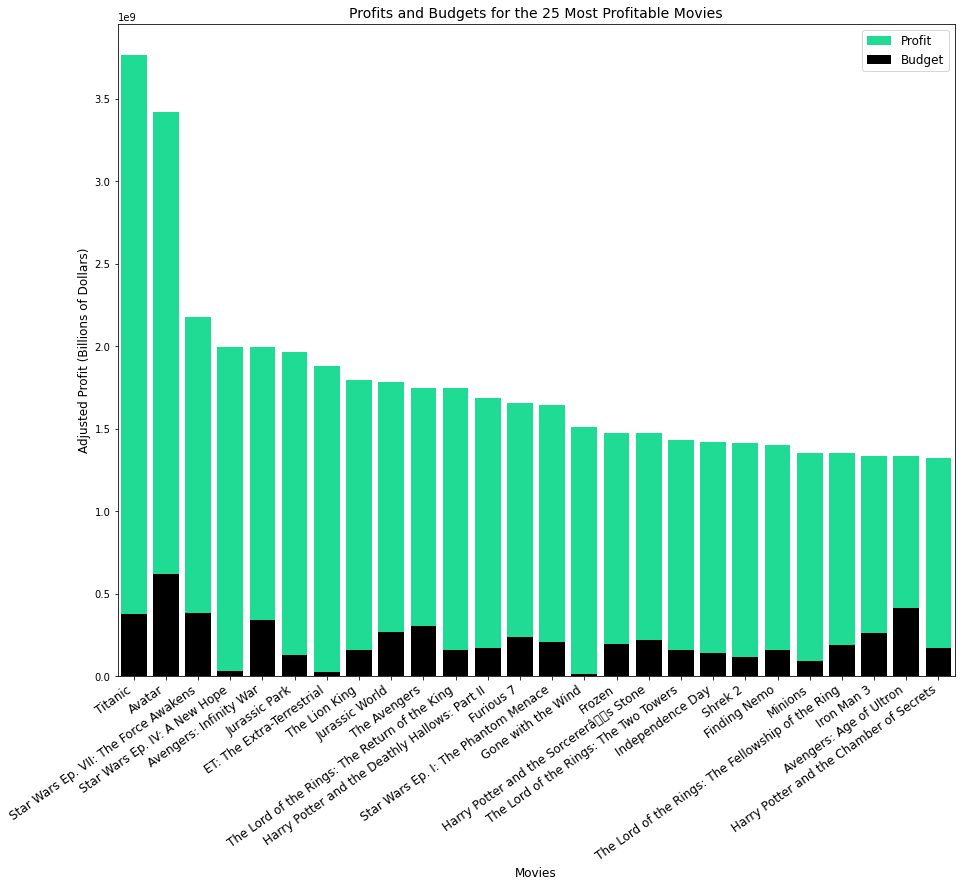

In [37]:
# Plot most profitable movies to have an idea of what the budget should be.
plt.figure(figsize=(15,12))
sns.barplot(x=profitable_ranked_df.loc[0:25, 'movie'], y=profitable_ranked_df.loc[0:25, 'adjusted_profit'], 
            color='mediumspringgreen', label='Profit', ci=None)
sns.barplot(x=profitable_ranked_df.loc[0:25, 'movie'],y=profitable_ranked_df.loc[0:25, 'adjusted_production_budget'], 
            color='black', label='Budget', ci=None)
plt.xlabel('Movies', fontsize=12)
plt.title("Profits and Budgets for the 25 Most Profitable Movies", fontsize=14)
plt.ylabel('Adjusted Profit (Billions of Dollars)', fontsize=12)
plt.xticks(rotation=35, horizontalalignment='right', fontsize=12)
plt.legend(fontsize=12)
plt.savefig('../images/profit_budget_top_25');

In [19]:
# describe all dataset
profitable_movies_df['adjusted_production_budget'].describe()

count    3.611000e+03
mean     5.861323e+07
std      6.708001e+07
min      1.754500e+03
25%      1.235875e+07
50%      3.431250e+07
75%      7.998500e+07
max      6.183750e+08
Name: adjusted_production_budget, dtype: float64

In [20]:
ajusted_production_budget_median = profitable_movies_df['adjusted_production_budget'].median()
ajusted_production_budget_median

34312500.0

In [21]:
# describe most profitable movies dataset
profitable_movies_df.loc[0:24, 'adjusted_production_budget'].describe()

count    2.300000e+01
mean     3.729203e+08
std      8.134337e+07
min      2.702500e+08
25%      3.243750e+08
50%      3.637500e+08
75%      3.772350e+08
max      6.183750e+08
Name: adjusted_production_budget, dtype: float64

In [22]:
profitable_movies_median = profitable_movies_df.loc[0:24, 'adjusted_production_budget'].median()
profitable_movies_median

363750000.0

In [23]:
# describe all dataset
profitable_movies_df['profit_margin'].describe()

count    3611.000000
mean        0.623736
std         0.244866
min         0.000265
25%         0.461530
50%         0.675288
75%         0.817422
max         0.999444
Name: profit_margin, dtype: float64

In [24]:
profitable_movies_median = profitable_movies_df['profit_margin'].median()
profitable_movies_median

0.6752879384206055

In [25]:
# describe most profitable movies
profitable_movies_df.loc[0:24, 'profit_margin'].describe()

count    23.000000
mean      0.663288
std       0.195405
min       0.027506
25%       0.633137
50%       0.732681
75%       0.761808
max       0.853525
Name: profit_margin, dtype: float64

In [26]:
profitable_top25_movies_median = profitable_movies_df.loc[0:24, 'profit_margin'].median()
profitable_top25_movies_median

0.7326814373125027

In [27]:
len(profitable_ranked_df)

3611

In [28]:
len(profitable_ranked_df.loc[profitable_ranked_df['profit_margin'] > 0.5])

2594

As we can see the most successful movies have incredible profits and profit margings. Titanic(1997), Avatar, two of the Star Wars saga, and Avengers:Infinity War are the most successful movies in term of profits.

What's happening? 

Let's pick up a valid margin that we would like to see on each movie produced. Of all the 3611 profitable movies (profit > <span>&#36;</span>0) 2594 have a profit margin of more than 50<span>&#37;</span>. Meaning, we can be more aggresive in choosing a threshold for the profit margin. The top 25 movies have a median profit margin of 73.27<span>&#37;</span> with a median production budget of <span>&#36;</span>363.750.000. When looking to all profitable movies the profit margin is of 67.53<span>&#37;</span> and a budget of <span>&#36;</span>34.312.500. We choose the median here to describe the data since the mean will be skewed because the data outliners.

Let's evaluate the data with a profit margin of 75<span>&#37;</span> or greater and a budget greater than <span>&#36;</span>34.312.500.

In [39]:
hipotesis_df = profitable_ranked_df[(profitable_ranked_df['profit_margin'] > 0.75) & (profitable_ranked_df['adjusted_production_budget'] > 34312500)]
hipotesis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 1329
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       499 non-null    int64  
 1   id                          499 non-null    int64  
 2   release_date                499 non-null    object 
 3   movie                       499 non-null    object 
 4   production_budget           499 non-null    float64
 5   domestic_gross              499 non-null    float64
 6   worldwide_gross             499 non-null    float64
 7   year                        499 non-null    int64  
 8   profit                      499 non-null    float64
 9   profit_margin               499 non-null    float64
 10  adjusted_production_budget  499 non-null    float64
 11  adjusted_profit             499 non-null    float64
dtypes: float64(7), int64(3), object(2)
memory usage: 50.7+ KB


We still have 499 movies left upon which we can draw some conclusions

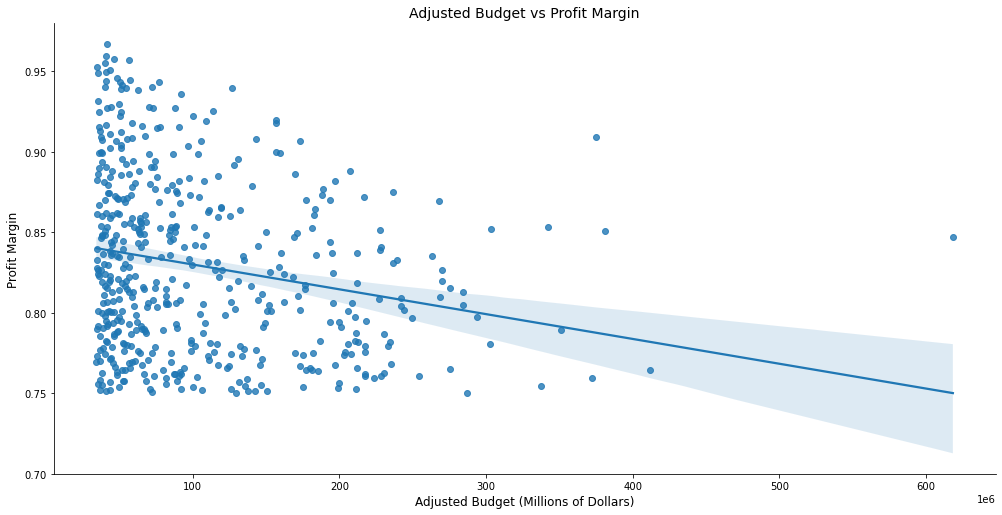

In [40]:
ax2 = sns.lmplot(x='adjusted_production_budget', y='profit_margin', data=hipotesis_df, height=7, aspect=2)
plt.xlabel('Adjusted Budget (Millions of Dollars)', fontsize=12)
plt.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
plt.ylabel('Profit Margin', fontsize=12)
plt.title('Adjusted Budget vs Profit Margin', fontsize=14)
plt.savefig('../images/budget_vs_margin.png');

In [31]:
print('median production bugdet', hipotesis_df['adjusted_production_budget'].mean())
print('median profit marging', hipotesis_df['profit_margin'].mean())

median production bugdet 104078951.20701404
median profit marging 0.8293540881079223


Using a scatter plot to examine the data. We can see that the data poits are more spreadout when comparing profit margin and production budget. The trend line in this case is negative which caution about spending to much money as we might potentially hurt our profit margin. Looking at the hipotesis data, we have a median production budget of <span>&#36;</span>104.078.951 and a median profit marging of 82.94<span>&#37;</span>.

#### Recommendation:

Microsoft to make movies with a production budget of <span>&#36;</span>104078951 to obtain profit margins of 82.94<span>&#37;</span>

## What genres are more common?

In [41]:
import sqlite3

In [51]:
conn = sqlite3.connect('../data/im.db')

In [52]:
# Query the database for all table names
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(query, conn)

In [53]:
print(tables)

            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [54]:
# The `im.db` is compouse of several tables,
# combining tables `movies` and `ratings`

movie_ratings = pd.read_sql("""
SELECT 
    `m`.*, `r`.`averagerating`, `r`.`numvotes`
FROM `movie_basics` AS `m`
INNER JOIN `movie_ratings` AS `r` USING(`movie_id`)
WHERE `m`.`genres` IS NOT NULL
;""", conn)

In [55]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73052 entries, 0 to 73051
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73052 non-null  object 
 1   primary_title    73052 non-null  object 
 2   original_title   73052 non-null  object 
 3   start_year       73052 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73052 non-null  float64
 7   numvotes         73052 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [56]:
movie_ratings.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [37]:
# From `What are the most profitable movies and how much you should expend`
profitable_movies_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,profit,profit_margin,adjusted_production_budget,adjusted_profit
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2009,2.351345e+09,0.846921,618375000.0,3.421207e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,6.350639e+08,0.607331,568681000.0,8.795635e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,1.072414e+09,0.764364,411597000.0,1.335155e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,9.997217e+08,0.759251,372475000.0,1.174673e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2015,1.747311e+09,0.850972,380970000.0,2.175402e+09


In [57]:
# merge tables 'profitable_movies_df' = movies profit > 0, used in previous section,
# with 'movie_ratings' to have a data frame with genres and budgets.
ratings_budget_df = profitable_movies_df.merge(movie_ratings, left_on="movie", right_on="primary_title")

In [58]:
ratings_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1731 entries, 0 to 1730
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          1731 non-null   int64  
 1   release_date                1731 non-null   object 
 2   movie                       1731 non-null   object 
 3   production_budget           1731 non-null   float64
 4   domestic_gross              1731 non-null   float64
 5   worldwide_gross             1731 non-null   float64
 6   year                        1731 non-null   int64  
 7   profit                      1731 non-null   float64
 8   profit_margin               1731 non-null   float64
 9   adjusted_production_budget  1731 non-null   float64
 10  adjusted_profit             1731 non-null   float64
 11  movie_id                    1731 non-null   object 
 12  primary_title               1731 non-null   object 
 13  original_title              1731 

In [59]:
# Let's drop of the `id` of the new created dataframe
ratings_budget_df.drop(['id'], axis=1)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,profit,profit_margin,adjusted_production_budget,adjusted_profit,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2009,2.351345e+09,0.846921,618375000.0,3.421207e+09,tt1775309,Avatar,Abatâ,2011,93.0,Horror,6.1,43
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,6.350639e+08,0.607331,568681000.0,8.795635e+08,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",6.6,447624
2,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,1.072414e+09,0.764364,411597000.0,1.335155e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594
3,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,1.748134e+09,0.853525,342000000.0,1.992873e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926
4,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,2017,3.559452e+08,0.542645,352500000.0,4.182356e+08,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy",6.5,329135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726,"Nov 12, 2010",Tiny Furniture,50000.0,391674.0,4.241490e+05,2010,3.741490e+05,0.882117,71000.0,5.312916e+05,tt1570989,Tiny Furniture,Tiny Furniture,2010,98.0,"Comedy,Drama,Romance",6.2,13397
1727,"Feb 22, 2008",The Signal,50000.0,251150.0,4.062990e+05,2008,3.562990e+05,0.876938,74500.0,5.308855e+05,tt2910814,The Signal,The Signal,2014,97.0,"Drama,Mystery,Sci-Fi",6.1,58407
1728,"Mar 18, 2016",Krisha,30000.0,144822.0,1.448220e+05,2016,1.148220e+05,0.792849,36300.0,1.389346e+05,tt4266638,Krisha,Krisha,2015,83.0,Drama,7.2,5917
1729,"Jan 14, 2000",The Terrorist,25000.0,195043.0,1.950430e+05,2000,1.700430e+05,0.871823,44250.0,3.009761e+05,tt9248762,The Terrorist,The Terrorist,2018,NaN,Thriller,6.0,6


In [60]:
# Convert `genres` from string to a list, and explode the `genres` column.
ratings_budget_df['genres'] = ratings_budget_df['genres'].str.split(',')

In [61]:
exploded_ratings_budget_df = ratings_budget_df.explode('genres')
exploded_ratings_budget_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,profit,profit_margin,adjusted_production_budget,adjusted_profit,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2009,2.351345e+09,0.846921,618375000.0,3.421207e+09,tt1775309,Avatar,Abatâ,2011,93.0,Horror,6.1,43
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,6.350639e+08,0.607331,568681000.0,8.795635e+08,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,Action,6.6,447624
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,6.350639e+08,0.607331,568681000.0,8.795635e+08,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,Adventure,6.6,447624
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,6.350639e+08,0.607331,568681000.0,8.795635e+08,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,Fantasy,6.6,447624
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,1.072414e+09,0.764364,411597000.0,1.335155e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,Action,7.3,665594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727,19,"Feb 22, 2008",The Signal,50000.0,251150.0,4.062990e+05,2008,3.562990e+05,0.876938,74500.0,5.308855e+05,tt2910814,The Signal,The Signal,2014,97.0,Mystery,6.1,58407
1727,19,"Feb 22, 2008",The Signal,50000.0,251150.0,4.062990e+05,2008,3.562990e+05,0.876938,74500.0,5.308855e+05,tt2910814,The Signal,The Signal,2014,97.0,Sci-Fi,6.1,58407
1728,38,"Mar 18, 2016",Krisha,30000.0,144822.0,1.448220e+05,2016,1.148220e+05,0.792849,36300.0,1.389346e+05,tt4266638,Krisha,Krisha,2015,83.0,Drama,7.2,5917
1729,48,"Jan 14, 2000",The Terrorist,25000.0,195043.0,1.950430e+05,2000,1.700430e+05,0.871823,44250.0,3.009761e+05,tt9248762,The Terrorist,The Terrorist,2018,NaN,Thriller,6.0,6


In [62]:
movies_by_genres = exploded_ratings_budget_df.groupby('genres', as_index=False)['primary_title'].count().sort_values(by=['primary_title'], ascending=False)

In [63]:
movies_by_genres

,genres,primary_title
7,Drama,852
4,Comedy,500
0,Action,423
1,Adventure,339
19,Thriller,289
16,Romance,203
11,Horror,203
5,Crime,198
14,Mystery,140
17,Sci-Fi,132


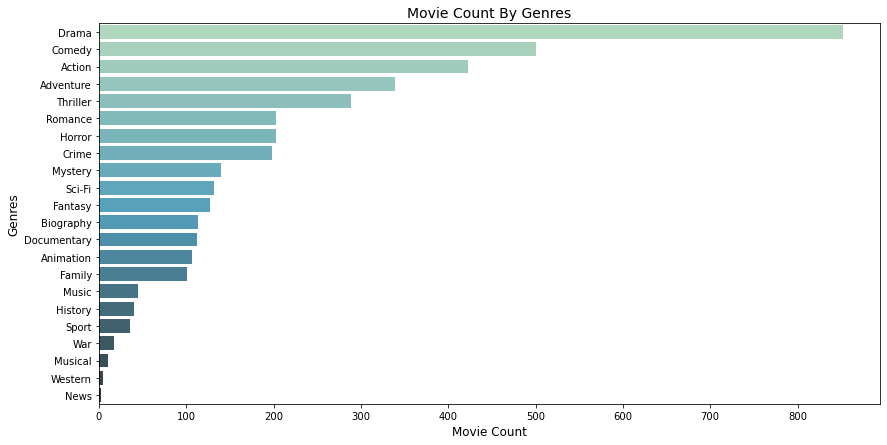

In [64]:
plt.figure(figsize=(14,7))
ax3 = sns.barplot(x=movies_by_genres['primary_title'], y=movies_by_genres['genres'], palette='GnBu_d')
plt.xlabel('Movie Count', fontsize=12)
plt.ylabel('Genres', fontsize=12)
plt.title('Movie Count By Genres', fontsize=14)
plt.savefig('../images/movie_count_by_genre.png');

Drama, Comedy, and Action are the dominating factor in the quantity of movies by genre. Does this necessarily mean these are the most profitable genres? In order to determine this we will once again group each genre but this time we are going to take a look at the average net profit for each.

In [46]:
profit_by_genres = exploded_ratings_budget_df.groupby('genres', as_index=False)[['adjusted_profit', 'profit_margin']].median().sort_values(by='adjusted_profit', ascending=False)

In [47]:
profit_by_genres

,genres,adjusted_profit,profit_margin
2,Animation,2.717527e+08,0.690364
1,Adventure,2.096146e+08,0.670905
17,Sci-Fi,1.856927e+08,0.703653
13,Musical,1.322214e+08,0.793865
0,Action,1.293366e+08,0.652401
9,Fantasy,1.028605e+08,0.623991
21,Western,8.775544e+07,0.446240
8,Family,8.323962e+07,0.619474
20,War,7.506902e+07,0.576016
4,Comedy,7.133026e+07,0.658712


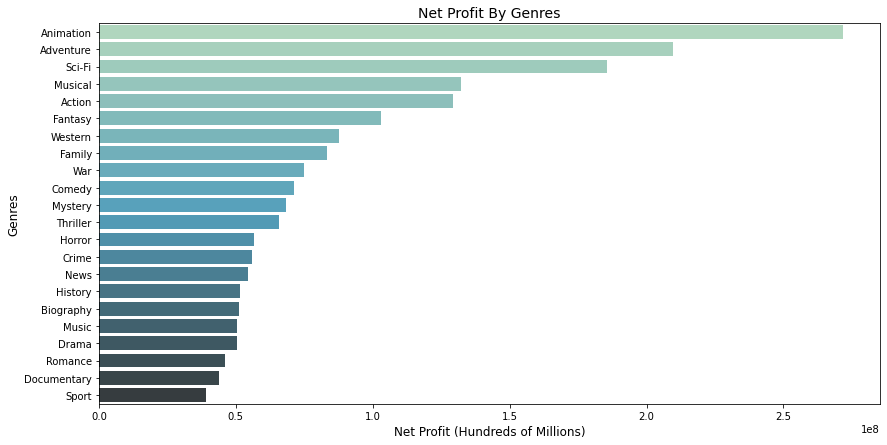

In [48]:
plt.figure(figsize=(14,7))
ax4 = sns.barplot(x=profit_by_genres['adjusted_profit'], y=profit_by_genres['genres'], palette='GnBu_d')
plt.xlabel('Net Profit (Hundreds of Millions)', fontsize=12)
plt.ylabel('Genres', fontsize=12)
plt.title('Net Profit By Genres', fontsize=14)
plt.savefig('net_profit_by_genres');

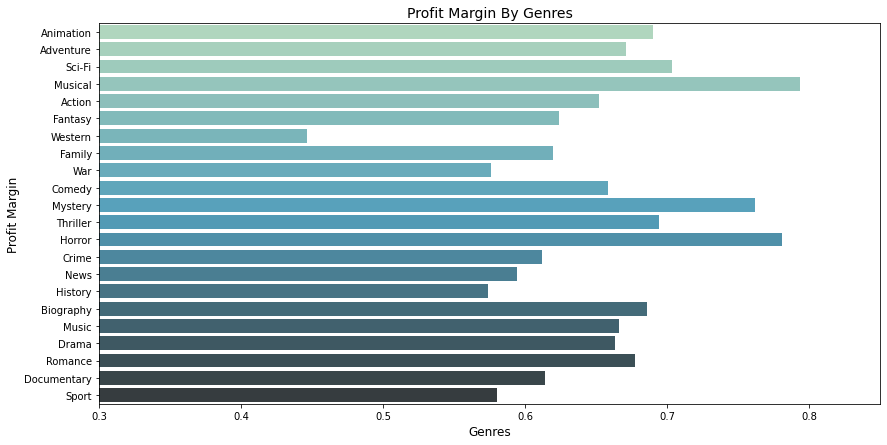

In [49]:
plt.figure(figsize=(14,7))
ax5 = sns.barplot(x=profit_by_genres['profit_margin'], y=profit_by_genres['genres'], palette='GnBu_d')
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Profit Margin', fontsize=12)
plt.title('Profit Margin By Genres', fontsize=14)
plt.xlim(0.3, 0.85)
plt.savefig('profit_margin_by_genre');

Even though animation, adventure, and sci-fi are not the common release genres but typically they have the most success in terms of median net profit.
We can also see that animation has a desirable profit margin along with musicals, mystery and horror. Note: Musicals is in the range of .8+ profit margin this is based on 10 movies and has to be disgregarded due to the small sample size.

Lastly, of what percentage of the total net profit from all genres does each genre account?

In [50]:
percentage_by_genres = exploded_ratings_budget_df.groupby(['genres'], as_index=False)['adjusted_profit'].sum().sort_values(by='adjusted_profit', ascending=False)

In [51]:
percentage_by_genres['total_of_net_profit'] = (percentage_by_genres['adjusted_profit']/percentage_by_genres['adjusted_profit'].sum()*100).round(2)
percentage_by_genres

,genres,adjusted_profit,total_of_net_profit
1,Adventure,1.235026e+11,17.59
0,Action,1.064582e+11,15.16
7,Drama,8.590892e+10,12.24
4,Comedy,7.552482e+10,10.76
17,Sci-Fi,4.649600e+10,6.62
2,Animation,3.948307e+10,5.62
19,Thriller,3.852978e+10,5.49
9,Fantasy,3.645537e+10,5.19
11,Horror,2.375814e+10,3.38
8,Family,2.318468e+10,3.30


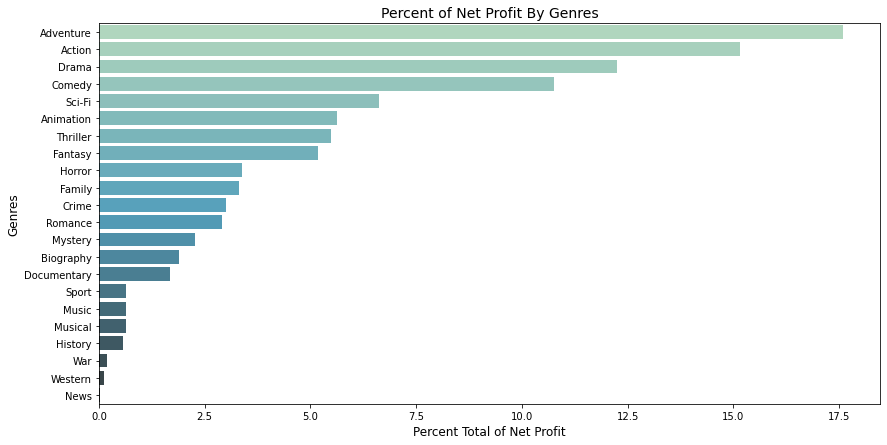

In [52]:
plt.figure(figsize=(14,7))
ax6 = sns.barplot(x=percentage_by_genres['total_of_net_profit'], y=percentage_by_genres['genres'], palette='GnBu_d')
plt.xlabel('Percent Total of Net Profit', fontsize=12)
plt.ylabel('Genres', fontsize=12)
plt.title('Percent of Net Profit By Genres', fontsize=14)
plt.savefig('percentage_of_profit_by_genres');

Adventure, action, comedy and drama make up the lionshare of the overall net profits from all movies. However, from our recent observations we know there are also major opportunities in the animation and sci-fi markets due to lower saturation but high average net profits. We will soon determine which genres are most successful during which months.

#### Recommendation:

Microsoft should focus their efforts on the top 6 most profitable movie genres: Adventure, Action, Comedy, Drama, Sci-Fi and Animation. As a material of the recommendation, Microsoft should enter the market for Sci-Fi and Animation movies since there is not much competition in these genres and there is a good opportunity to be profitable.

## What is the best time of the year to release a movie?

In [65]:
# Add a column with the `month` from the `release_date column`, from the previous dataset
exploded_ratings_budget_df['month'] = [x[0:3] for x in exploded_ratings_budget_df['release_date']]
exploded_ratings_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3993 entries, 0 to 1730
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          3993 non-null   int64  
 1   release_date                3993 non-null   object 
 2   movie                       3993 non-null   object 
 3   production_budget           3993 non-null   float64
 4   domestic_gross              3993 non-null   float64
 5   worldwide_gross             3993 non-null   float64
 6   year                        3993 non-null   int64  
 7   profit                      3993 non-null   float64
 8   profit_margin               3993 non-null   float64
 9   adjusted_production_budget  3993 non-null   float64
 10  adjusted_profit             3993 non-null   float64
 11  movie_id                    3993 non-null   object 
 12  primary_title               3993 non-null   object 
 13  original_title              3993 

In [66]:
# month where most movies are released
movies_by_month = exploded_ratings_budget_df.groupby(['month'], as_index=False)['movie'].count().sort_values(by='movie', ascending=False)
movies_by_month

,month,movie
2,Dec,422
9,Nov,388
0,Apr,353
10,Oct,350
1,Aug,339
7,Mar,332
5,Jul,331
6,Jun,329
11,Sep,311
3,Feb,295


In [67]:
movies_by_month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 2 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   month   12 non-null     object
 1   movie   12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


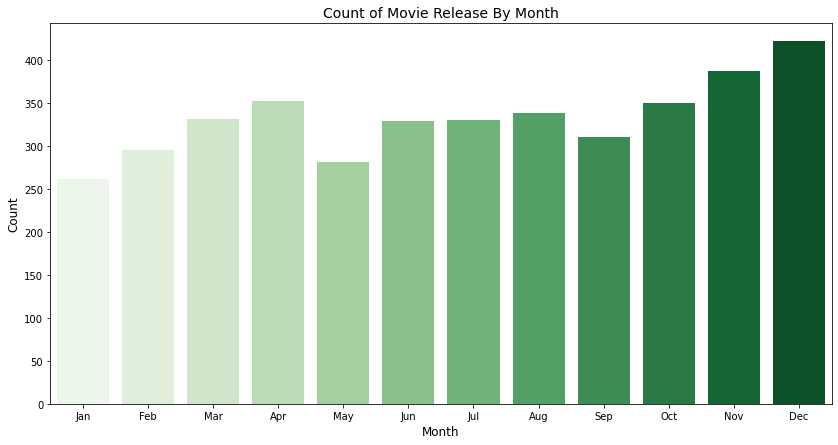

In [73]:
plt.figure(figsize=(14,7))
ax7 = sns.barplot(x=movies_by_month['month'], y=movies_by_month['movie'], palette='Greens', order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of Movie Release By Month', fontsize=14)
plt.savefig('../images/count_movies_by_month.png');

As you can see December is the best month where most movies are released having the last quarter of the year the quarter that most movies are released. Does it mean profitability? 

In [69]:
percentage_by_month = exploded_ratings_budget_df.groupby(['month'], as_index=False)[['adjusted_profit', 'profit_margin']].median().sort_values(by='adjusted_profit', ascending=False)
percentage_by_month

,month,adjusted_profit,profit_margin
5,Jul,1.293366e+08,0.713572
6,Jun,1.279738e+08,0.689401
8,May,1.190736e+08,0.658827
9,Nov,9.907017e+07,0.698381
2,Dec,9.224606e+07,0.641232
7,Mar,8.375814e+07,0.665102
3,Feb,7.650000e+07,0.698495
4,Jan,7.055537e+07,0.745953
1,Aug,5.479392e+07,0.580701
10,Oct,5.354806e+07,0.624832


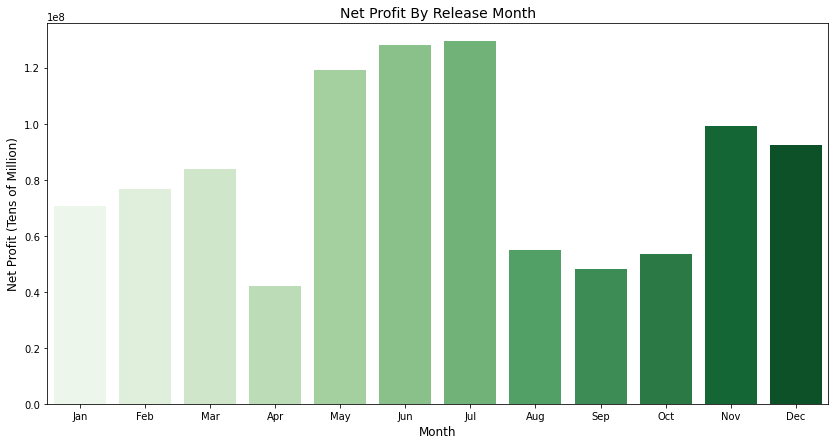

In [71]:
plt.figure(figsize=(14,7))
ax8 = sns.barplot(x=percentage_by_month['month'], y=percentage_by_month['adjusted_profit'], palette='Greens', order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month', fontsize=12)
plt.ylabel('Net Profit (Tens of Million)', fontsize=12)
plt.title('Net Profit By Release Month', fontsize=14)
plt.savefig('../images/profit_by_month.png');

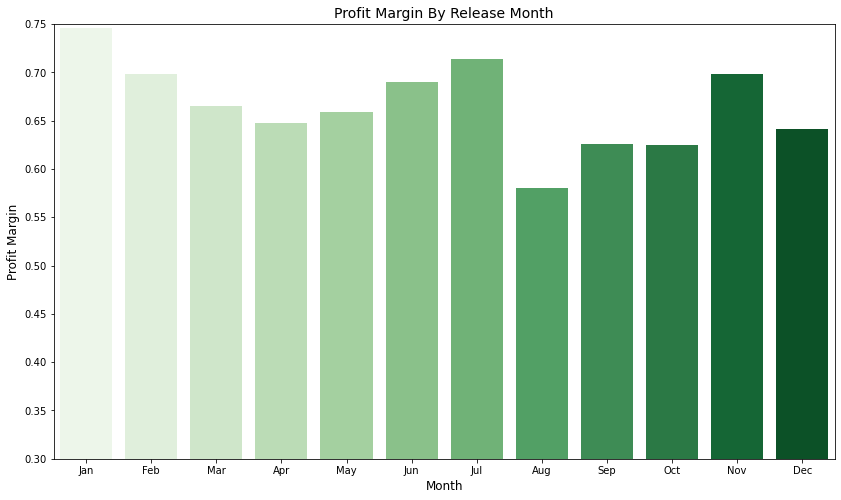

In [72]:
plt.figure(figsize=(14,8))
ax9 = sns.barplot(x=percentage_by_month['month'], y=percentage_by_month['profit_margin'], palette='Greens', order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month', fontsize=12)
plt.ylabel('Profit Margin', fontsize=12)
plt.title('Profit Margin By Release Month', fontsize=14)
plt.ylim(0.3, 0.75)
plt.savefig('../images/profit_margin_by_month.png');

May, June and July are the best months to release a movie and obtain a good profit.
Taking about profit margins, January is the best month to release a movie but one more time May, June and July also still good months to release movies. It appears that the beginning of the summer is a good time to release movies.

## Conclusions:

* Starting with a production budget of $104078951 will allow Microsoft to obtain a margin profit of 82.94%
* Microsoft should concentrated in the 6 best genres: Adventure, Action, Comedy, Drama, Sci-Fi and Animation. Where Sci-Fi and Animation have less competition.
* The best months to release a profitable movie are May, June, and July.